<a href="https://colab.research.google.com/github/vineel-M/Project/blob/main/Text_Analytics_Project_Online_Lounge_Reviewsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [ ]:
data = pd.read_csv("/content/lounge.csv", encoding='utf-8')


In [ ]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
data.head()

,id,lounge_name,author,date_of_review,review_text,airport,lounge_type,overall_rating,comfort,cleanliness,bar_beverages,catering,washrooms,wifi_connectivity,staff_service
0,1,Adria Airways Business Class Lounge,R Deu,09 March 2014,There are 2 separate areas with arm chairs and TV for relaxing and working the other with other arm chairs PC computer TV bar and sitting area. There are newspapers and magazines also some airline magazines. Decoration is fresh and modern. It is clean and well maintained. Bottled drinks coffee m...,NaN,Business Class,3.0,3,4,3.0,3.0,3.0,2.0,2.0
1,2,Business Class - Larnaca Airport,Andreas Kar,13 June 2015,"It is a small, dark, windowless lounge located on the 3rd floor, accessible via elevator. The bar is well equipped with soft drinks, coffee, wines and biers.",Larnaca Airport,Business Class,5.0,4,4,3.0,3.0,3.0,4.0,4.0
2,3,Aegean Airlines Business Class Lounge - Athens Airport,A Diakomichalis,05 October 2014,Both of the lounges have the same food (sandwiches yogurt cheese cheese pie fruits) and beverages (all sorts of coffee tea bottled drinks alcoholic drinks Greek wine) .The decoration in Thessaloniki is very stylish and the bathroom too . Athens is nice but probably needs to be updated.,Athens Airport,Business Class,5.0,5,5,5.0,4.0,4.0,5.0,5.0
3,4,Aegean Airlines Business Class Lounge - Athens Airport,R Deu,11 March 2014,The lounge was clean and the decor is up to date with colourful chairs. Only one PC and mainly empty bar. Food is some sandwiches cheese and nuts. A lot needs to be improved. I went to Lufthansa lounge where hot food was provided.,Athens Airport,Business Class,2.0,3,3,2.0,1.0,2.0,3.0,2.0
4,5,Aegean Airlines Business Class Lounge - Thessaloniki Airport,Petros Papadopoulos,24 July 2012,Big and spacious lounge. Comfy sofas and a nice variety of food/drinks. The lounge was recently refurbished and looks very stylish. stuff very friendly and they let you know when your flight starts boarding.,Thessaloniki Airport,Business Class,5.0,5,5,4.0,4.0,4.0,5.0,5.0


In [ ]:
data.shape

(2264, 15)

In [ ]:
data_cleaned = data.dropna()

In [ ]:
data.dropna(inplace=True)

In [ ]:
comm = data.sample(1000)
comm.shape

(1000, 15)

In [ ]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in comm['review_text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)

    except:
        polarity.append(0)
        subjectivity.append(0)


In [ ]:
#Adding the Sentiment Polarity column to the data
comm['polarity']=polarity
comm['subjectivity']=subjectivity

In [ ]:
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity<0].head(10)

,lounge_name,review_text,polarity,subjectivity
1495,Philippine Airlines Mabuhay Business Class Lounge - Manila Airport,For such a lounge it's definitely substandard. What I have not found in previous comments/reviews is the washrooms (there are no showers as noted by others) which are tiny! These which are supposed to handle multiple persons are barely larger than those on the aircraft and have a total of two si...,-0.023810,0.416667
657,"British Airways ""inn At Atlanta"" Business Class Lounge - Atlanta Hartsfield Airport",This lounge has a very limited range of food and drink but this would be just about acceptable if there was somewhere to escape the relentless sax led funk background music. Dreadful.,-0.546429,0.592857
949,Etihad Airways Business Class Lounge - Abu Dhabi Airport,The moment I walked in I could see it was crowded big time and it was hard to find a place to sit. It is 1/20th smaller than emirates lounge in Dubai. Food a good spread and very efficient staff. Quiet room spacious but sleeping on couch is always painful for a tall guy. Washrooms cramped to the...,-0.052083,0.474375
1162,Hawaiian Airlines First Business Class Lounge - Los Angeles Lax Airport,Very basic and rather poor. Only juices tea and coffee. No food. Seats are rather uncomfortable. We only used the Wi-fi and then went elsewhere to have a drink and something to eat. Not good and no private washrooms.,-0.178571,0.676786
1205,Japan Airlines Sakura Business Class Lounge - Fukuoka Airport,This is the worst business class lounge I have ever been in. The drink selection is poor and only a few cookies for food. It is extremely small and the no smoking area wreaked of smoke. It is more comfortable sitting at the gate. At least by the gate you aren't subjected to second hand smoke.,-0.138889,0.533333
579,British Airways Business Class Lounge - London Heathrow Airport,First time in this Lounge. Very disappointing 6pm food was curry chilli jacket potato with beans - really inspiring. Tables left dirty for over 15 minutes.,-0.126000,0.608667
232,Air New Zealand Kona Business Class Lounge - Melbourne Airport,Dinner menu - reconstituted chicken meat crumbed (called them chicken burgers) and wedges that were rock hard the only hot food on offer. One plate of cold cuts were the cold offering for the first five clients in the lounge - never re filled. My husband suggested Mcdonalds would offer more vari...,-0.172639,0.827917
959,Etihad Airways (air Nz) Business Class Lounge - Brisbane Airport,This lounge is over crowed. No peace area. Lots of screaming kids. Very limit selection of food and drinks. Atmosphere is a sort of darkish. In general uncomfortable. Not to be recommended.,-0.083333,0.600000
125,Air France / Skyteam Business Class Lounge - Paris CDG Airport,Absolutely appalling. Dreadful food and tables covered with dirty plates and glasses that the non- existent staff have failed to remove. Quite the worst lounge I have ever been in.,-0.690000,0.800000
1924,Domestic Lounge - Bangkok Suvarnabhumi Airport,"I have been using this lounge for 7 years now and it keeps going downhill. The furniture is the same as it was when the lounge opened. There has been no upkeep. The food is very average. A few hot snacks like dim sum, and cold tiny sandwiches. There was one juice with no sugar, apple juice. no a...",-0.204500,0.549500


In [ ]:
#Displaying the POSITIVE comments
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity>0].head(10)

,lounge_name,review_text,polarity,subjectivity
690,British Airways First Class Concorde Room Lounge - London Heathrow Airport,First time flying in First through T5 and huge disappointment with the Concorde Lounge - no dedicated security checks means you stand in a queue for 30 minutes. Lounge is small and cramped - staff poorly trained and clearly have no natural customer service flair. Restaurant booths were full when...,0.100000,0.410000
1486,Oman Air Business Class Lounge - Muscat Seeb Airport,It is a peaceful place. For much of the time the lounge has few passengers. The quality of food and drink is of a high standard. Staff are helpful. I did experience a problem in using the wi-fi but there were PCs available. The lounge is a pleasant place for a short stopover.,0.192917,0.375833
1531,Qantas Business Class Lounge - Hong Kong Airport,Typically disappointing Qantas lounge. Crowded grumpy staff and passengers sprawled everywhere with luggage blocking seats. I noticed many tables had reserved signs - in all my years of travel with Qantas I was not aware that it was possible to reserve tables in the lounge. Food was generally ok...,0.009921,0.519841
2130,"Vietnam Airlines Business Class ""orchid"" Lounge - Ho Chi Minh City Airport",Some food available - noodles curry some snacks in wrappers. Extensive soft drinks 4 types of wine (2 almost completely undrinkable) and many choices of beers. Good wifi comfortable chairs and not overcrowded. No showers available. Overall this is a pretty basic lounge and none of the food or be...,0.295556,0.525000
1758,Singapore Airlines First Class Lounge - London Heathrow Airport,Visited the Singapore Airlines T3 lounge at London Heathrow as a passenger with Thai Airways en route to BKK. Star Alliance lounge share. As always lounge was peaceful. Good flow of fresh foods with staff preparing more pastries when they ran short. A much better option than using the London Lou...,0.357143,0.461905
1393,Malaysia Airlines Business Class Lounge - Delhi Airport,This lounge is an embarrassment. Staff is largely absent food is Lukewarm lounge is an open seating area in the mezzanine of Delhi International where the noise comes in unfiltered there are four old Win95 desktops WiFi requires a complex picture ID procedure and bathrooms are basically the same...,0.146032,0.339286
1164,Business Lounge - Hong Kong Airport,"A very impressive lounge located near gate 23 with a clear view of the runway. The variety of food and drinks offered is amazing, staff are very friendly and helpful. Plenty of room to lounge about, computers and printers available. There is also an area where you can take a quite nap which is d...",0.415227,0.566667
2040,Turkish Airlines Business Class Lounge - Istanbul Ataturk Airport,This newly renovated lounge provides a relaxing experience and is very spacious. The toilets/showers are stylish and modern. The negative comment I would make is relating to the staff who I found rather unfriendly.,0.147273,0.490909
247,Air New Zealand Koru Business Class Lounge - Auckland Airport,Lots of changes since last visit. Most changes not good. Overcrowded and uninviting. No views of airport at all. All windows frosted!. Never again. Will not be renewing Koru membership.,0.020833,0.388889
1971,Thai Airways Royal Silk Business Class Lounge - Bangkok Suvarnabhumi Airport,The lounge is looking a bit tired and tatty but still clean and tidy plenty of food and drink with very attentive staff. No shower available but there is a spa lounge. Toilets kept clean by very friendly staff and glasses plates etc removed promptly. Flight info screens but no loudspeaker broadc...,0.355104,0.681250


In [ ]:
#Displaying the NEGATIVE comments
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity<0].head(10)

,lounge_name,review_text,polarity,subjectivity
1495,Philippine Airlines Mabuhay Business Class Lounge - Manila Airport,For such a lounge it's definitely substandard. What I have not found in previous comments/reviews is the washrooms (there are no showers as noted by others) which are tiny! These which are supposed to handle multiple persons are barely larger than those on the aircraft and have a total of two si...,-0.023810,0.416667
657,"British Airways ""inn At Atlanta"" Business Class Lounge - Atlanta Hartsfield Airport",This lounge has a very limited range of food and drink but this would be just about acceptable if there was somewhere to escape the relentless sax led funk background music. Dreadful.,-0.546429,0.592857
949,Etihad Airways Business Class Lounge - Abu Dhabi Airport,The moment I walked in I could see it was crowded big time and it was hard to find a place to sit. It is 1/20th smaller than emirates lounge in Dubai. Food a good spread and very efficient staff. Quiet room spacious but sleeping on couch is always painful for a tall guy. Washrooms cramped to the...,-0.052083,0.474375
1162,Hawaiian Airlines First Business Class Lounge - Los Angeles Lax Airport,Very basic and rather poor. Only juices tea and coffee. No food. Seats are rather uncomfortable. We only used the Wi-fi and then went elsewhere to have a drink and something to eat. Not good and no private washrooms.,-0.178571,0.676786
1205,Japan Airlines Sakura Business Class Lounge - Fukuoka Airport,This is the worst business class lounge I have ever been in. The drink selection is poor and only a few cookies for food. It is extremely small and the no smoking area wreaked of smoke. It is more comfortable sitting at the gate. At least by the gate you aren't subjected to second hand smoke.,-0.138889,0.533333
579,British Airways Business Class Lounge - London Heathrow Airport,First time in this Lounge. Very disappointing 6pm food was curry chilli jacket potato with beans - really inspiring. Tables left dirty for over 15 minutes.,-0.126000,0.608667
232,Air New Zealand Kona Business Class Lounge - Melbourne Airport,Dinner menu - reconstituted chicken meat crumbed (called them chicken burgers) and wedges that were rock hard the only hot food on offer. One plate of cold cuts were the cold offering for the first five clients in the lounge - never re filled. My husband suggested Mcdonalds would offer more vari...,-0.172639,0.827917
959,Etihad Airways (air Nz) Business Class Lounge - Brisbane Airport,This lounge is over crowed. No peace area. Lots of screaming kids. Very limit selection of food and drinks. Atmosphere is a sort of darkish. In general uncomfortable. Not to be recommended.,-0.083333,0.600000
125,Air France / Skyteam Business Class Lounge - Paris CDG Airport,Absolutely appalling. Dreadful food and tables covered with dirty plates and glasses that the non- existent staff have failed to remove. Quite the worst lounge I have ever been in.,-0.690000,0.800000
1924,Domestic Lounge - Bangkok Suvarnabhumi Airport,"I have been using this lounge for 7 years now and it keeps going downhill. The furniture is the same as it was when the lounge opened. There has been no upkeep. The food is very average. A few hot snacks like dim sum, and cold tiny sandwiches. There was one juice with no sugar, apple juice. no a...",-0.204500,0.549500


In [ ]:
#Displaying the NEUTRAL comments
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity==0].head(10)

,lounge_name,review_text,polarity,subjectivity
2026,Turkish Airlines Business Class Lounge - Istanbul Ataturk Airport,Huge sprawling open-plan lounge rammed full of people with a very random and disorganised lay-out. Also not one real quiet area with groups of people sitting around shouting people listening to iPads laptops on speaker - just very chaotic and not a nice place to wait for a flight.,0.0,0.65
2144,"United Airlines ""star Alliance"" Business Class Lounge - Los Angeles Lax Airport",Disgraceful. Food consisted of carrots and cheese and biscuits in plastic packs. Crowded you have to pay for drinks. If this is how United treat their customers they've lost my custom.,0.0,0.00


In [ ]:
#Displaying highly positive reviews
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity>0.75].head(10)

,lounge_name,review_text,polarity,subjectivity
527,Cathay Pacific Business Class Lounge - Hong Kong Airport,Very impressed with the quality and service received at all lounges. Amazing washroom facilities and quite areas for relaxing between flights. Food and drink was also very good!,0.866667,0.893333
361,Ana All Nippon Airways Business Class Lounge - Tokyo Haneda Airport,One of the best lounges I have ever been to. Great food and drinks courteous and efficient staff and excellent shower facilities.,0.850000,0.762500
1300,Gate A13 - Frankfurt Main Airport,"A dignified and relaxing lounge, very attentive Lufthansa staff. Excellent DO&CO cuisine with buffet and a la carte dishes, dreamlike desserts.",0.760000,1.000000


Text(0.5, 1.0, 'Common Words in Reviews - Positive')

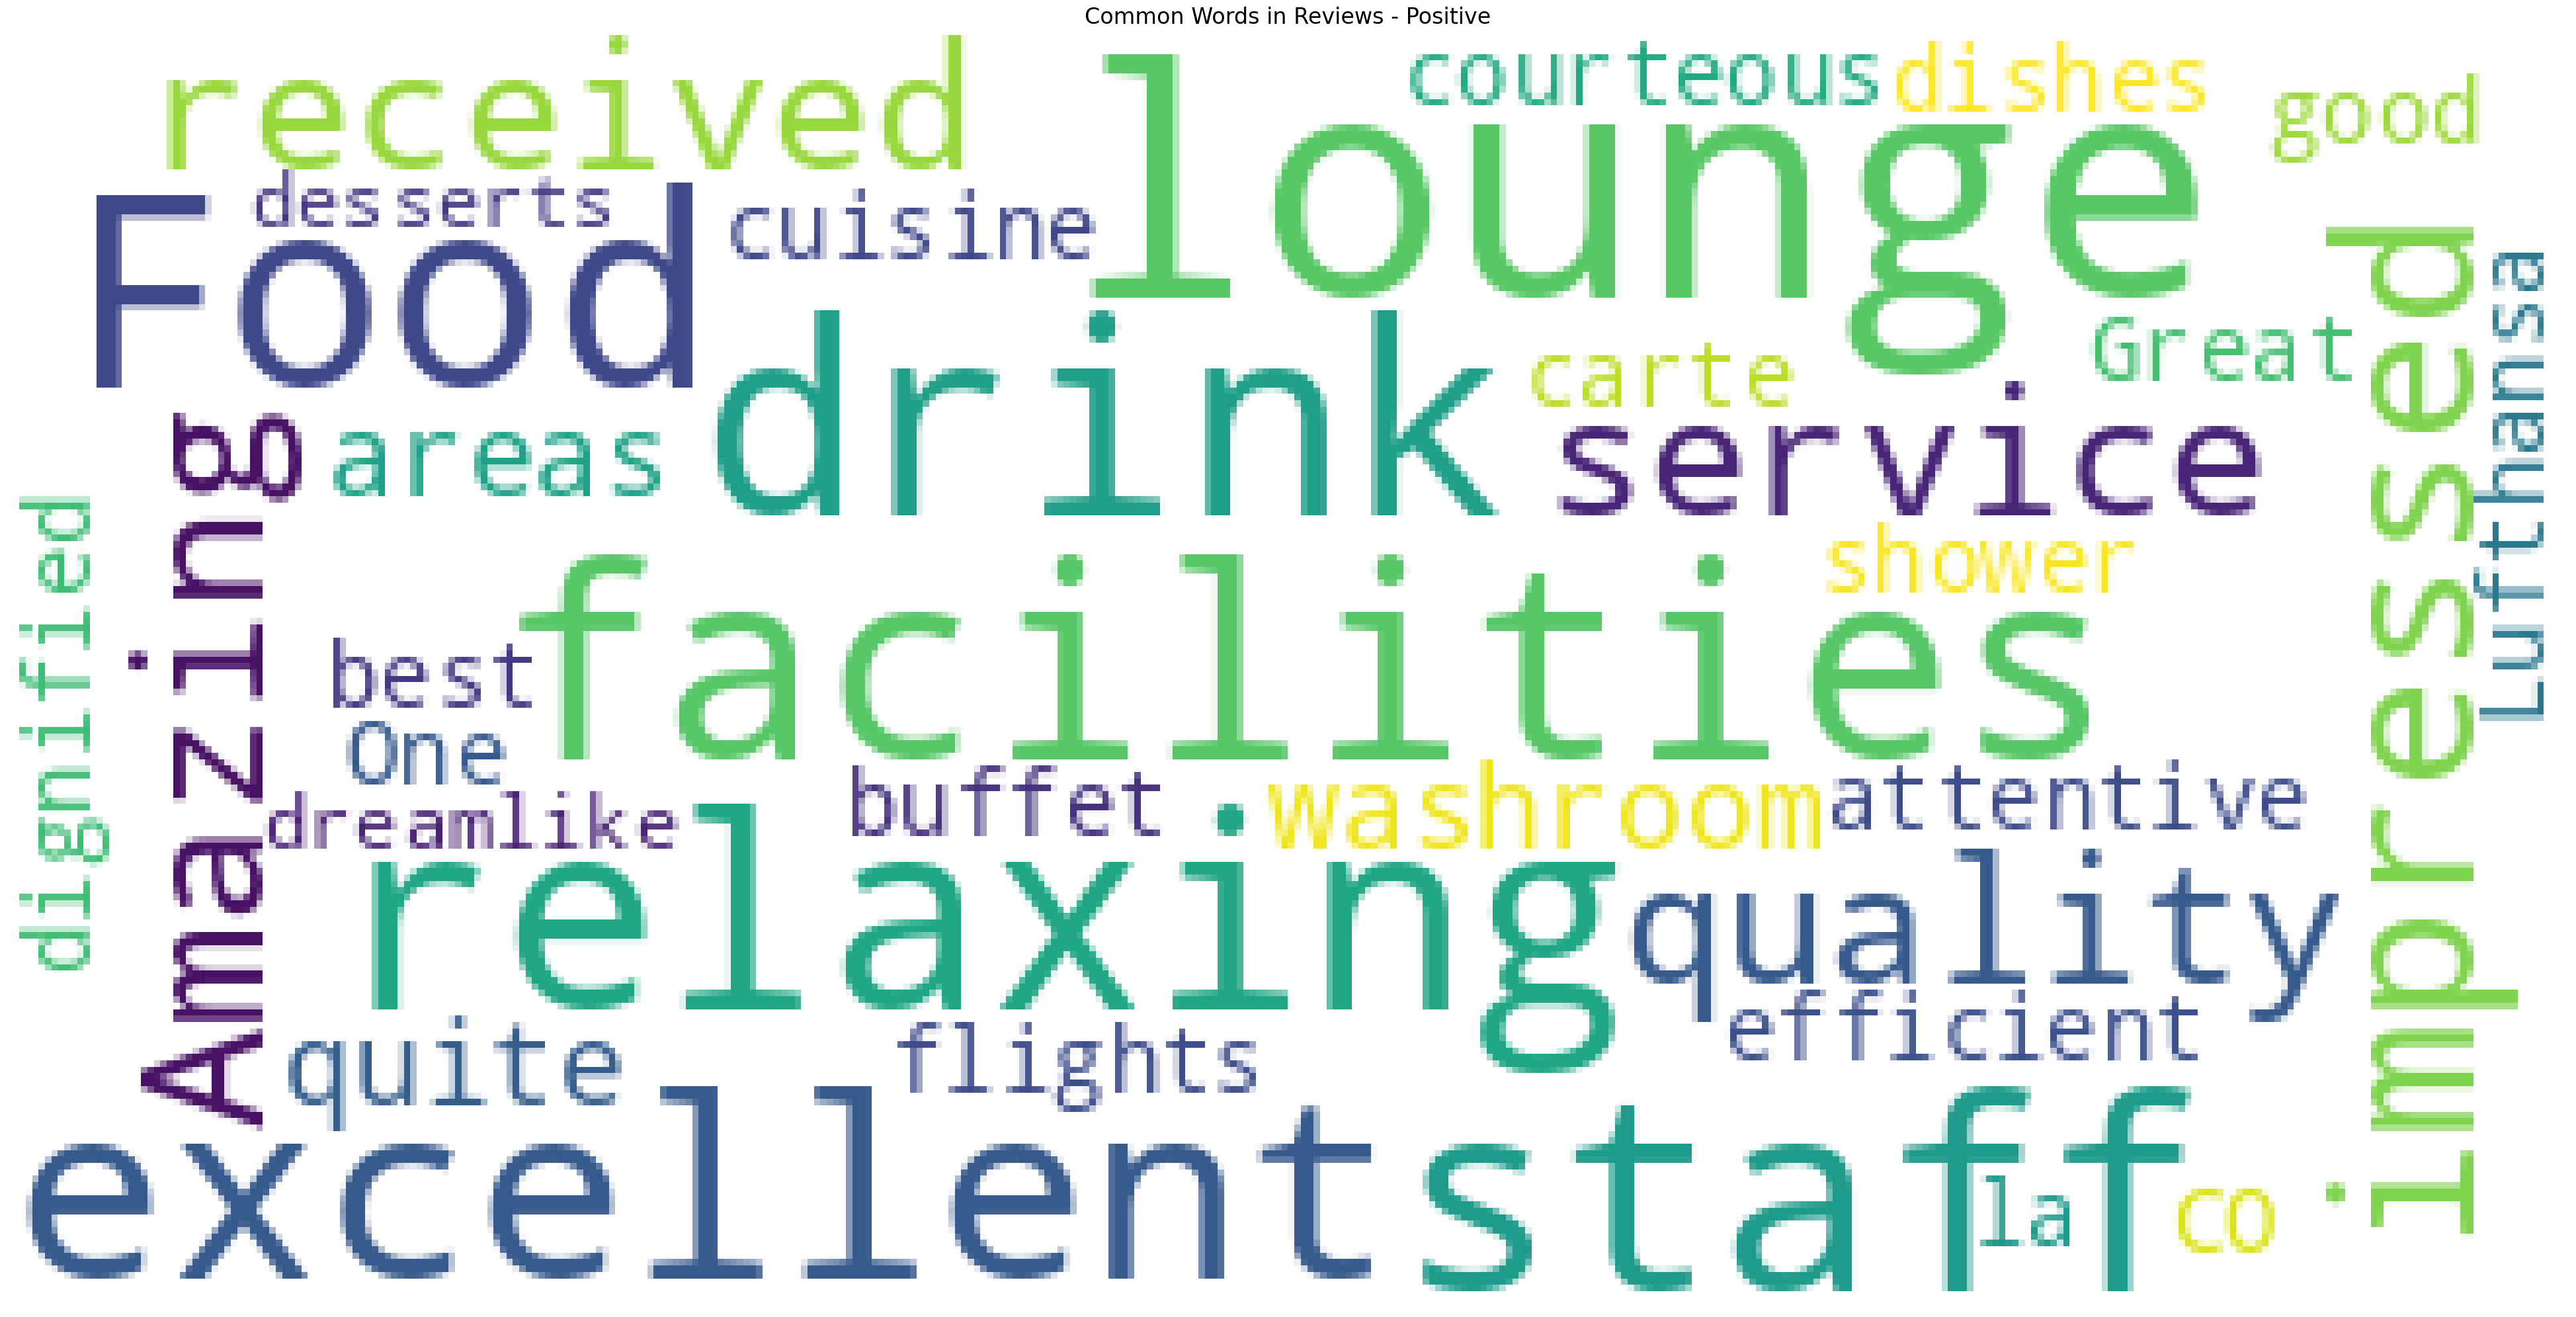

In [ ]:
wc(comm['review_text'][comm.polarity > 0.75], 'white', 'Common Words')
plt.title("Common Words in Reviews - Positive", fontsize=24)

In [ ]:
#Displaying highly negative reviews
comm[['lounge_name','review_text','polarity','subjectivity']][comm.polarity<-0.4].head(10)

,lounge_name,review_text,polarity,subjectivity
657,"British Airways ""inn At Atlanta"" Business Class Lounge - Atlanta Hartsfield Airport",This lounge has a very limited range of food and drink but this would be just about acceptable if there was somewhere to escape the relentless sax led funk background music. Dreadful.,-0.546429,0.592857
125,Air France / Skyteam Business Class Lounge - Paris CDG Airport,Absolutely appalling. Dreadful food and tables covered with dirty plates and glasses that the non- existent staff have failed to remove. Quite the worst lounge I have ever been in.,-0.690000,0.800000
463,Business Class - Amsterdam Schiphol Airport,After reading all the reviews I wonder does BA actually have anyone reading these complaints? Have they ever responded? We travel to the USA often and when we do we use the lounges lately every thing has gone downhill in Amsterdam Schiphol selection was sparse. Heathrow too crowded people laying...,-0.433333,0.566667
916,Ethiopian Airlines Business Class 'cloud Nine' Lounge - Addis Ababa Airport,Shocking in about every aspect. First of all difficult to find as no signs (it's their hub and both the airport and the airline have the same owner: the Ethiopian government!). Then once found terribly disappointing : no welcome from the staff (they pull faces to everybody entering not very comf...,-0.402622,0.669580
2100,Us Airways No 1 Traveller Business Class Lounge - London Gatwick Airport,Terrible. No room to sit. People allowed to use up sofa space with bags and no challenge from staff. Wifi too slow to be usable.,-0.650000,0.700000
1161,Hawaiian Airlines Business Class Lounge - Honolulu Airport,Truly pathetic no food no alcohol? Coffee and soft drinks ? Extremely lame by world standards. One would think they would improve their offering considering what their partners like Qantas offer.,-0.466667,0.700000
2236,"Virgin Atlantic ""air America"" Business Class Lounge - Miami Airport",I'm currently sitting in the lounge. Only 3 other passengers in here so I'm wondering if there is another Virgin lounge here as this one is abysmal. No food whatsoever. No atmosphere. Probably the worst lounge I've been in. The staff begrudgingly trundled off to get me some milk for my lukewarm ...,-0.425000,0.755000
1305,Lufthansa Business Class Lounge - Cologne/bonn Airport,Another visit to this lounge and nothing has been done to improve the miserably inadequate levels of catering. Soup or spaetzle potato salad and that's about it apart from a few pieces of bread and some peppers plus sweets and peanuts. So I've made yet another complaint and will keep doing so un...,-0.500000,0.433333
1160,Hawaiian Airlines First Class Lounge - Honolulu Airport,This has to go down as the worst airline lounge I have been in. The air was thick with the smell of stale cigarette smoke it is a non smoking lounge. There is no food on offer not even a cracker and signs everywhere stating outside food is not allowed in lounge - offer some food if you don't wan...,-0.412593,0.515648
772,Delta Air Lines First Class Lounge - Atlanta Hartsfield Airport,As a very frequent flyer my wife and I think that this is the worst lounge we have ever been in. The staff on front desk surly and totally not interested in their customers who pay their wages they need to be reminded food options non existent. Coffee machine broken not in use . I think Delta ne...,-0.461000,0.631333


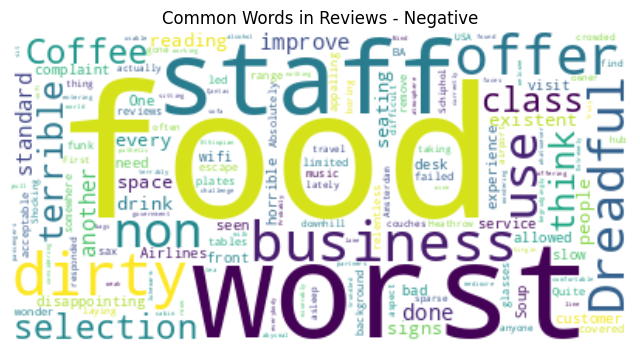

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_negative_wordcloud(data):
    stopwords = set(STOPWORDS)
    stopwords.update(['airline', 'hotel', 'lufthansa', 'lounges', 'lounge'])

    negative_text = " ".join(review for review in data['review_text'][data.polarity < -0.4])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative_text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Common Words in Reviews - Negative")
    plt.show()

generate_negative_wordcloud(comm)


<Axes: >

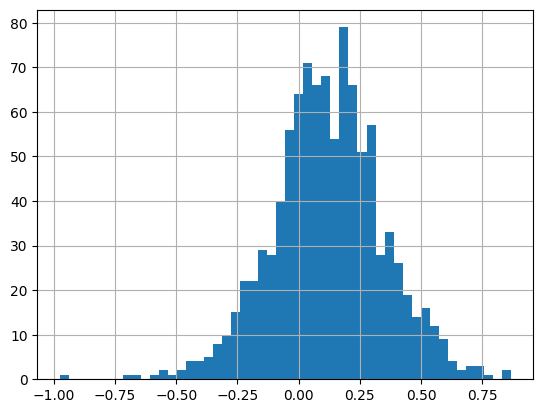

In [ ]:
comm.polarity.hist(bins=50)

<Axes: >

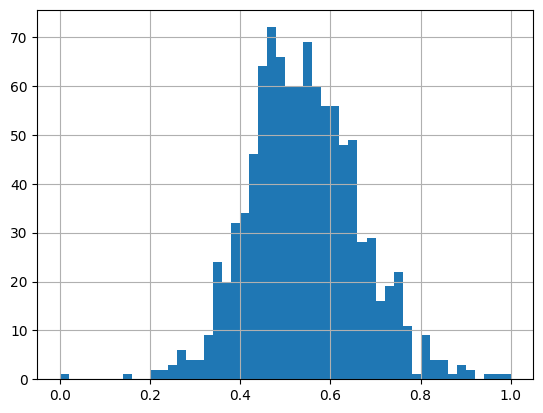

In [ ]:
comm.subjectivity.hist(bins=50)

In [ ]:
#Converting the polarity values from continuous to categorical
comm['polarity'][comm.polarity==0]= 0
comm['polarity'][comm.polarity > 0]= 1
comm['polarity'][comm.polarity < 0]= -1

 1.0    719
-1.0    279
 0.0      2
Name: polarity, dtype: int64

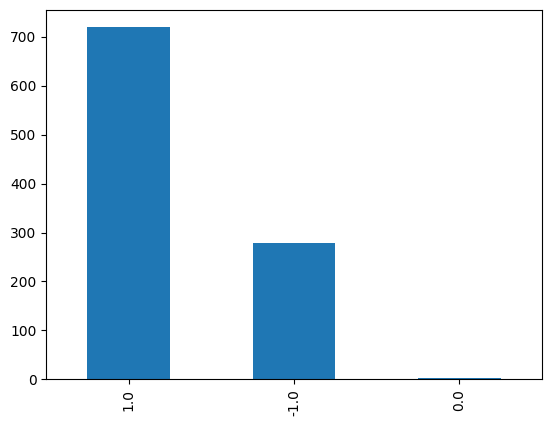

In [ ]:
comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()

 The majority are positive (1.0), with a count of 719. There are fewer negative reviews (-1.0), totaling 279. Neutral reviews (0.0) are minimal, with only 2 in the dataset.